In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN


In [2]:
# Step 1: Create a synthetic imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.9, 0.1], n_informative=3,
                           n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=42)



In [3]:
# Step 2: Apply ADASYN to the dataset
adasyn = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=5)
X_resampled, y_resampled = adasyn.fit_resample(X, y)


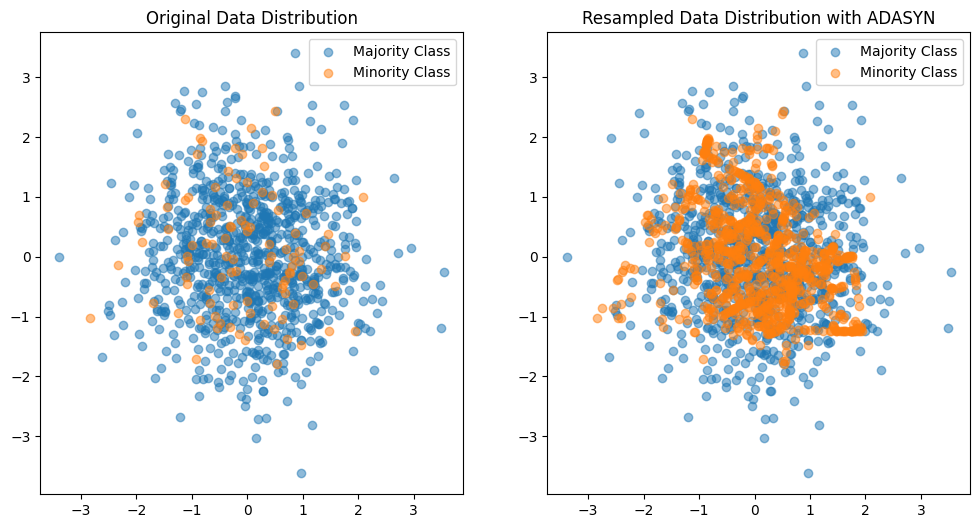

In [4]:

# Step 3: Visualize the results
plt.figure(figsize=(12, 6))

# Plot the original data distribution
plt.subplot(1, 2, 1)
plt.title('Original Data Distribution')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Majority Class', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Minority Class', alpha=0.5)
plt.legend()

# Plot the resampled data distribution
plt.subplot(1, 2, 2)
plt.title('Resampled Data Distribution with ADASYN')
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1],
            label='Majority Class', alpha=0.5)
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1],
            label='Minority Class', alpha=0.5)
plt.legend()

plt.show()


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [6]:
df = pd.read_csv('bcwd.csv')
df.head()

,radius_0ean,texture_0ean,peri0eter_0ean,area_0ean,s0oothness_0ean,co0pactness_0ean,concavity_0ean,concave points_0ean,sy00etry_0ean,fractal_di0ension_0ean,...,texture_worst,peri0eter_worst,area_worst,s0oothness_worst,co0pactness_worst,concavity_worst,concave points_worst,sy00etry_worst,fractal_di0ension_worst,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.2, random_state=42)

In [9]:
# Step 2: Apply ADASYN to the dataset
synthetic = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=2)
X_resampled, y_resampled = adasyn.fit_resample(xtrain, ytrain)

In [10]:
X_resampled.shape, y_resampled.shape

((574, 30), (574,))

In [11]:
df.Class.value_counts()

Class
1    357
0    212
Name: count, dtype: int64

In [ ]:

# Step 3: Visualize the results
plt.figure(figsize=(12, 6))

# Plot the original data distribution
plt.subplot(1, 2, 1)
plt.title('Original Data Distribution')
plt.scatter(xtrain[ytrain == 0][:, 0], xtrain[ytrain == 0][:, 1], label='Minority Class', alpha=0.5)
plt.scatter(xtrain[ytrain == 1][:, 0], xtrain[ytrain == 1][:, 1], label='Majority Class', alpha=0.5)
plt.legend()

# Plot the resampled data distribution
plt.subplot(1, 2, 2)
plt.title('Resampled Data Distribution with ADASYN')
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1],
            label='Majority Class', alpha=0.5)
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1],
            label='Minority Class', alpha=0.5)
plt.legend()


plt.show()